### 1. Edge Detection

(a) Implement convolution process of smoothing Image 1 with a 5 x 5 Gaussian Filter with $\sigma$ = 1 and 2 , plot the corresponding output images.

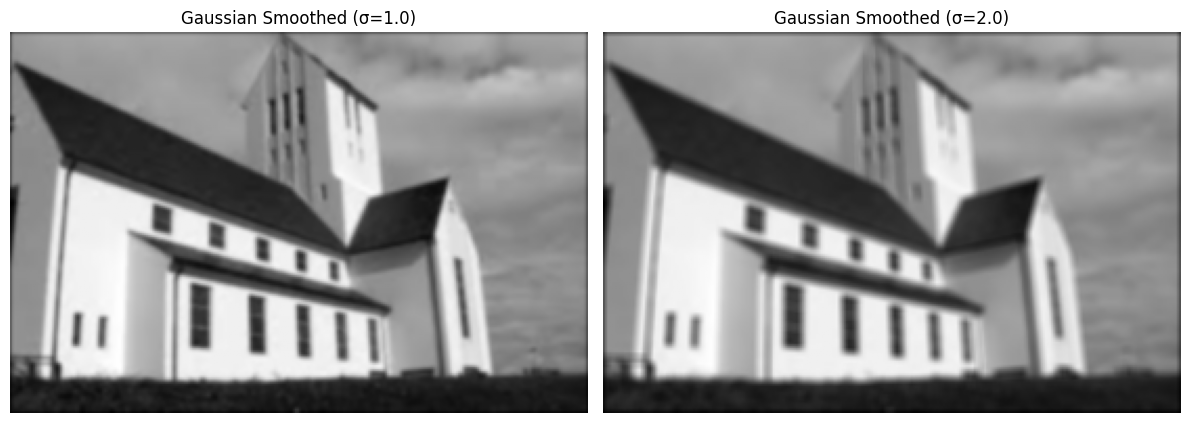

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def convolution(input_image, filter_kernel):
    image_height, image_width = input_image.shape
    kernel_size = filter_kernel.shape[0]
    pad_size = kernel_size // 2
    padded_image = np.pad(input_image, pad_width=pad_size, mode='constant', constant_values=0)
    convolved_image = np.zeros_like(input_image, dtype=np.float64)
    for row in range(image_height):
        for col in range(image_width):
            region = padded_image[row:row + kernel_size, col:col + kernel_size]
            convolved_image[row, col] = np.sum(region * filter_kernel)
    return convolved_image

def gaussian_kernel_2d(k_size, sigma_val):
    kernel_matrix = np.zeros((k_size, k_size), dtype=np.float64)
    midpoint = k_size // 2
    
    for row in range(k_size):
        for col in range(k_size):
            delta_x = row - midpoint
            delta_y = col - midpoint
            kernel_matrix[row, col] = np.exp(-(delta_x**2 + delta_y**2) / (2 * sigma_val ** 2))

    kernel_matrix /= kernel_matrix.sum()
    return kernel_matrix

image = Image.open("image1.png").convert("L")
image_array = np.array(image, dtype=np.float64)

sigma_values = [1.0, 2.0]
smoothed_images = []

for sigma in sigma_values:
    kernel = gaussian_kernel_2d(5, sigma)
    smoothed_images.append(convolution(image_array, kernel))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for idx, (sigma, smoothed_image) in enumerate(zip(sigma_values, smoothed_images)):
    axes[idx].imshow(smoothed_image, cmap='gray')
    axes[idx].set_title(f"Gaussian Smoothed (σ={sigma})")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


(b) Implement convolution process of convolving a 3 x 3 Sobel filters ($S_x$ and $S_y$) with the output images you obtained in step a. Plot the outputs of each step and the final edge map which combines edges in $x$ and $y$ directions

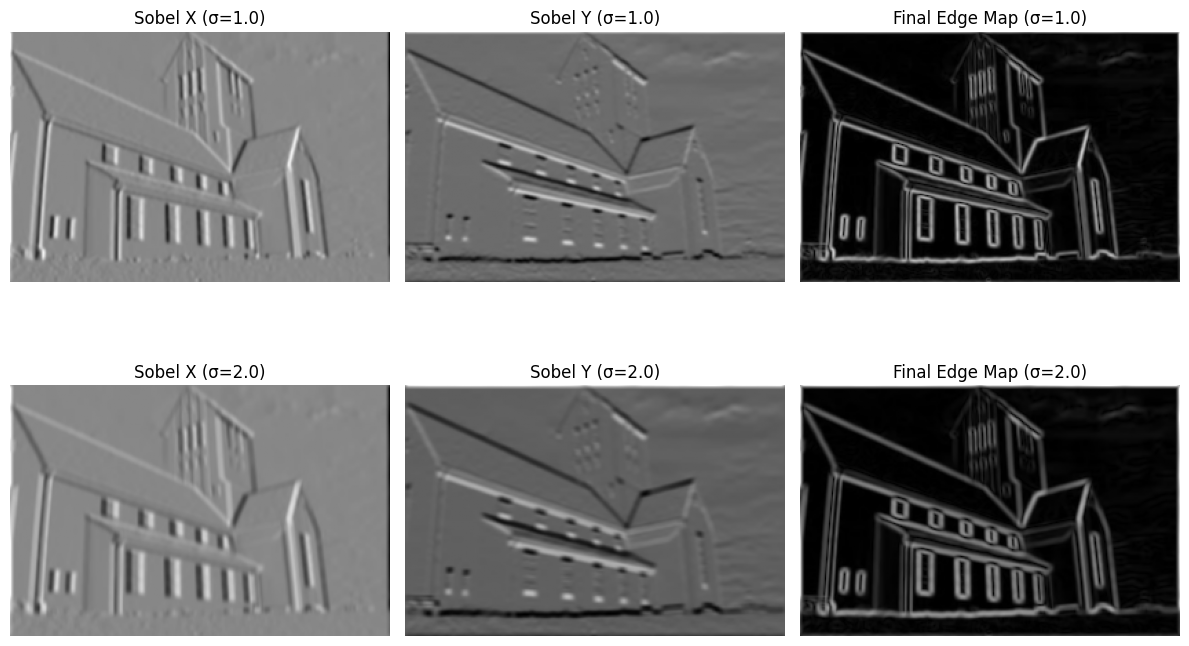

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

def sobel_kernels():
    Sx = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]], dtype=np.float64)
    
    Sy = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]], dtype=np.float64)
    
    return Sx, Sy

def edge_detection(image, Sx, Sy):
    grad_x = convolution(image, Sx)
    grad_y = convolution(image, Sy)
    edge_map = np.sqrt(grad_x**2 + grad_y**2)
    return grad_x, grad_y, edge_map

Sx, Sy = sobel_kernels()
edges = [edge_detection(smoothed, Sx, Sy) for smoothed in smoothed_images]

for idx, (sigma, (grad_x, grad_y, edge_map)) in enumerate(zip(sigma_values, edges)):
    axes[idx, 0].imshow(grad_x, cmap='gray')
    axes[idx, 0].set_title(f"Sobel X (σ={sigma})")
    axes[idx, 0].axis("off")

    axes[idx, 1].imshow(grad_y, cmap='gray')
    axes[idx, 1].set_title(f"Sobel Y (σ={sigma})")
    axes[idx, 1].axis("off")

    axes[idx, 2].imshow(edge_map, cmap='gray')
    axes[idx, 2].set_title(f"Final Edge Map (σ={sigma})")
    axes[idx, 2].axis("off")

plt.tight_layout()
plt.show()


(c) Implement convolution process of convolving Image 1 with $\frac{\partial G}{\partial x}$ and $\frac{\partial G}{\partial y}$ filters (5 × 5 filters and for $\sigma = 1$ and $2$) and plot the outputs of each step and the final edge map which combines edges in $x$ and $y$ directions.

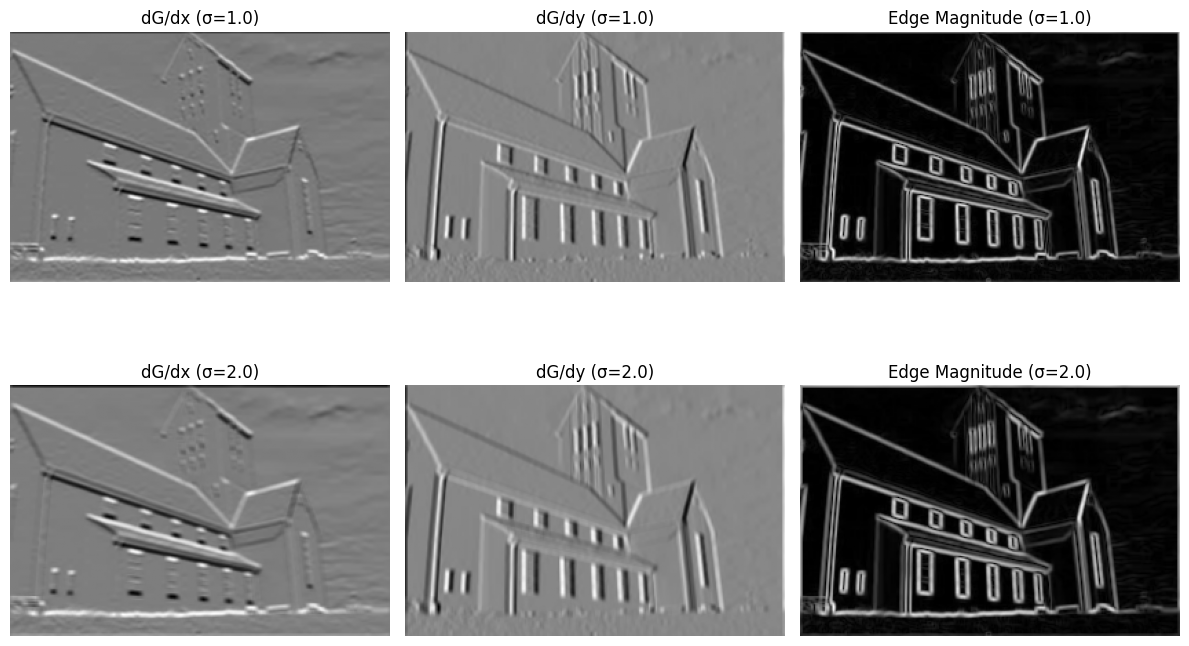

In [34]:
def gaussian_kernel_derivative(size, sigma, axis='x'):
    kernel = np.zeros((size, size), dtype=np.float64)
    center = size // 2

    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            gauss_exp = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
            val = -x * gauss_exp if axis == 'x' else -y * gauss_exp
            kernel[i, j] = val
    
    factor = 1.0 / (2.0 * np.pi * sigma**4)
    kernel *= factor
    return kernel

dog_kernels = [(gaussian_kernel_derivative(5, sigma, 'x'),
                gaussian_kernel_derivative(5, sigma, 'y')) for sigma in sigma_values]

dog_results = [(convolution(image_array, dx), convolution(image_array, dy)) for dx, dy in dog_kernels]

dog_magnitudes = [np.sqrt(Ix**2 + Iy**2) for Ix, Iy in dog_results]

# Display Derivative of Gaussian results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (sigma, (Ix, Iy), edge_mag) in enumerate(zip(sigma_values, dog_results, dog_magnitudes)):
    axes[i, 0].imshow(Ix, cmap='gray')
    axes[i, 0].set_title(f"dG/dx (σ={sigma})")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(Iy, cmap='gray')
    axes[i, 1].set_title(f"dG/dy (σ={sigma})")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(edge_mag, cmap='gray')
    axes[i, 2].set_title(f"Edge Magnitude (σ={sigma})")
    axes[i, 2].axis("off")
plt.tight_layout()
plt.show()


##### Observations of Final Output of b and c:
Edge Detection Sharpness: In part b, the edges appear sharper and more defined, particularly along architectural boundaries. In part c, the edges appear smoother and slightly more spread out, especially when $\sigma = 2$

Noise Sensitivity: The Sobel filter in part is more sensitive to high-frequency noise and small intensity changes, leading to noisier edges. The Gaussian derivative filter in part c reduces noise better, especially with a larger $\sigma$ due to the smoothing effect before differentiation.

Edge Continuity: Sobel filtering in b results in some broken edges where intensity changes are weaker. Gaussian derivative filtering in c produces more continuous and natural edges, as the Gaussian smoothing helps to integrate weaker edges into the response.

Effect of $\sigma$: Increasing $\sigma$ in part c makes edges smoother and broader, reducing noise but slightly blurring fine details. In contrast, Sobel filtering in part b does not involve smoothing, which keeps all fine details but retains noise.

Conclusion: 
The Gaussian derivative method part c provides better edge continuity and is less sensitive to noise, especially with $\sigma = 2$.\
The Sobel method part b enhances fine details like the windows and roofing but is more sensitive to noise.\
If noise reduction is important, Gaussian derivative filtering is better. If preserving fine details is important, Sobel filtering is better.

#### 2. Corner Detection
Implement Harris Corner Detection algorithm step by step as explained in the class. Apply your script to detect corners in image 1. Plot the corner response map, and the non-maximum suppression output.

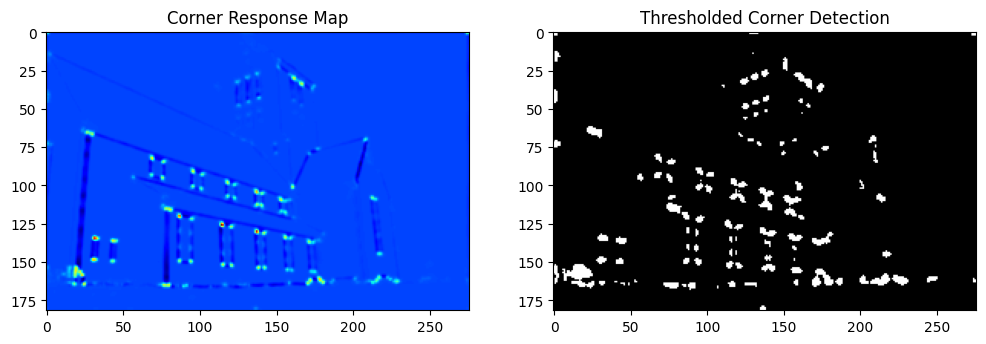

In [35]:
def harris_corner_detection(image, k=0.04, threshold=0.01):
    # Sobel kernels
    Sx = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]], dtype=np.float64)
    Sy = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]], dtype=np.float64)
    
    # Compute gradients
    Ix = convolution(image, Sx)
    Iy = convolution(image, Sy)

    # Compute products of derivatives
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy

    # Apply Gaussian smoothing
    gaussian_k = gaussian_kernel_2d(5, 1)
    Sxx = convolution(Ixx, gaussian_k)
    Syy = convolution(Iyy, gaussian_k)
    Sxy = convolution(Ixy, gaussian_k)

    # Compute Harris response
    detM = (Sxx * Syy) - (Sxy**2)
    traceM = Sxx + Syy
    R = detM - k * (traceM**2)

    # Thresholding
    corner_map = np.zeros_like(R)
    corner_map[R > threshold * R.max()] = 255

    return R, corner_map

# Compute Harris Corner Detection
response, corners = harris_corner_detection(image_array)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Corner Response Map")
plt.imshow(response, cmap='jet')

plt.subplot(1, 2, 2)
plt.title("Thresholded Corner Detection")
plt.imshow(corners, cmap='gray')
plt.show()
